# 1. Lesson01_Univariate_Plotting

In this tutorial, we will the basic of data viz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
input_file = 'https://minio.lab.sspcloud.fr/pengfei/diffusion/data_viz/winemag-data_first150k.csv'
vin_reviews = pd.read_csv(input_file, index_col=0)

In [3]:
print(vin_reviews.shape)
print(len(vin_reviews))
print(vin_reviews.head(3))

(150930, 10)
150930
  country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   

         region_1 region_2             variety                   winery  
0     Napa Valley     Napa  Cabernet Sauvignon                    Heitz  
1            Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  
2  Knights Valley   Sonoma     Sauvignon Blanc                 Macauley  


## 1.1 Bar plot

Bar plot is often used for visualize categorical data and, it is very flexible: The height can represent anything, as long as it is a number.
And each bar can represent anything, as long as it is a category.


In below example, we use bar plot to show the top 10 province for vine production

Top10Province plot says California produces far more wine than any other province of the world!
We might ask what percent of the total is Californian vintage? This bar chart tells us absolute numbers,
but it's more useful to know relative proportions.

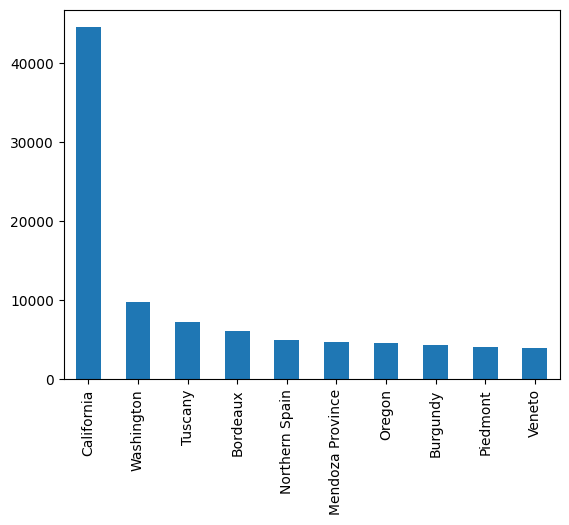

In [4]:
# show top 10 vin produce province
top10Province=vin_reviews['province'].value_counts().head(10).plot.bar()
plt.show(top10Province)

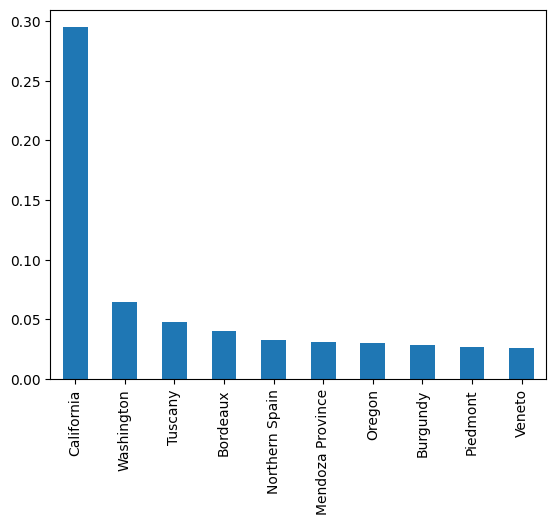

In [5]:
top10ProvincePercent=(vin_reviews['province'].value_counts().head(10) / len(vin_reviews)).plot.bar()
plt.show(top10ProvincePercent)

If the categories are `not nominal`, like earthquake magnitudes, housing complexes with certain number of apartment
(in our words, numeric) we may want to **order the bar name**, the following example shows the number of reviews of a
certain score allotted by Wine Magazine

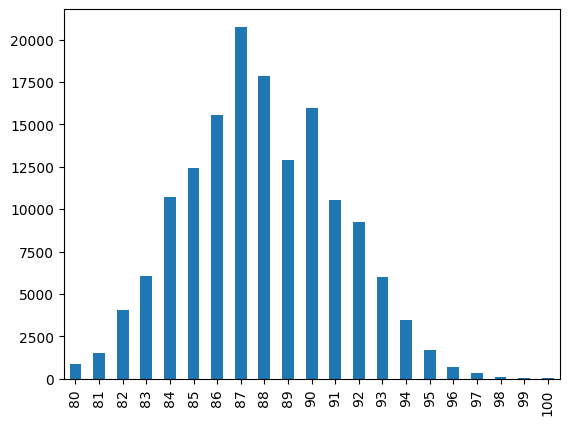

In [6]:
vinScoreCounts=vin_reviews['points'].value_counts().sort_index()
vinScoreCountsBarPlot=vinScoreCounts.plot.bar()

plt.show(vinScoreCountsBarPlot)

## 1.2 Line charts

The wine review scorecard has 20 different unique values to fill, for which our bar chart is just barely enough.
What would we do if the magazine rated things 0-100? We'd have 100 different categories; simply too many to fit
a bar in for each one!

In that case, instead of bar chart, we could use a line chart
In the following example, We can view the vin score with a line charts

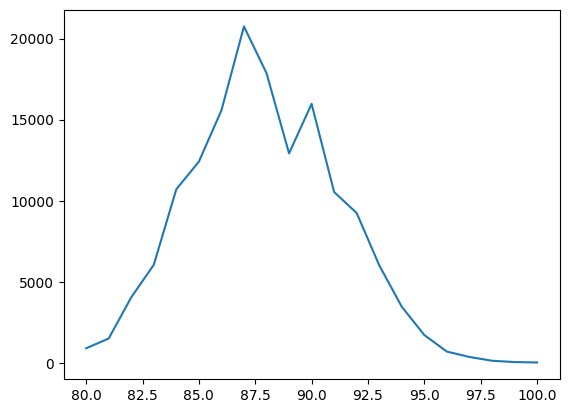

In [9]:
vinScoreCountsLineCharts= vinScoreCounts.plot.line()
plt.show(vinScoreCountsLineCharts)

A line chart can pass over any number of many individual values, making it the tool of first choice
for distributions with many unique values or categories.


## 1.3 bar vs line
Let's do a quick exercise. Suppose that we're interested in counting the following variables:

1.The number of tubs of ice cream purchased by flavor, given that there are 5 different flavors. (bar)
2.The average number of cars purchased from American car manufacturers in Michigan. (bar)
3.Test scores given to students by teachers at a college, on a 0-100 scale.(line)
4.The number of restaurants located on the street by the name of the street in Lower Manhattan.

For which of these would a bar chart be better? Which ones would be better off with a line?

Number 4 is a lot harder. City streets are obviously ordinary categorical variables, so we *ought* to use a bar chart;
but there are a lot of streets out there! We couldn't possibly fit all of them into a display.

Sometimes, your data will have too many points to do something "neatly", and that's OK.
If you organize the data by value count and plot a line chart over that, you'll learn
valuable information about *percentiles*: that a street in the 90th percentile has 20 restaurants,
for example, or one in the 50th just 6. This is basically a form of aggregation: we've turned streets into percentiles!

## 1.3 Area chart

Area charts are just line charts, but with the bottom shaded in. That's it!

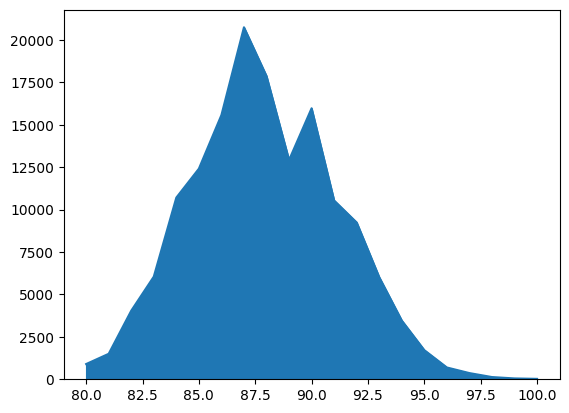

In [7]:
vinScoreCountsAreaCharts= vinScoreCounts.plot.area()
plt.show(vinScoreCountsAreaCharts)

## 1.4 Interval data

Examples of interval variables are the wind speed in a hurricane, shear strength in concrete, and the temperature
of the sun. An interval variable goes beyond an ordinal categorical variable: it has a meaningful order, in the sense
that we can quantify what the difference between two entries is itself an interval variable.

For example, if I say that this sample of water is -20 degrees Celcius, and this other sample is 120 degrees Celcius,
then I can quantify the difference between them: 140 degrees "worth" of heat, or such-and-such many joules of energy.

The difference can be qualitative sometimes. At a minimum, being able to state something so clearly feels a lot more
"measured" than, say, saying you'll buy this wine and not that one, because this one scored a 92 on some taste test
and that one only got an 85. More definitively, any variable that has infinitely many possible values is definitely
an interval variable (why not 120.1 degrees? 120.001? 120.0000000001? Etc).

Line charts work well for interval data. Bar charts don't—unless your ability to measure it is very limited,
interval data will naturally vary by quite a lot.

Let's apply a new tool, the histogram, to an interval variable in our dataset,
price (we'll cut price off at 200$ a bottle; more on why shortly).

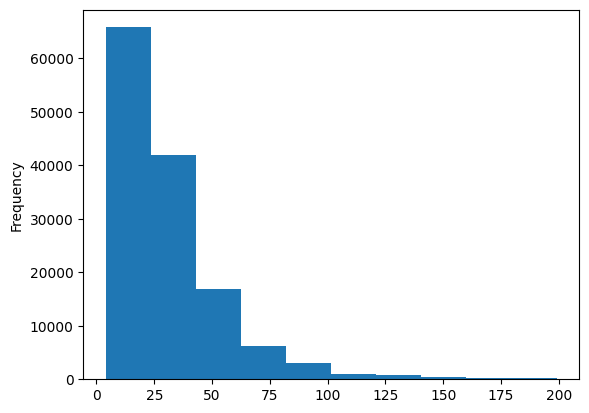

In [11]:
vin_reviews[vin_reviews['price']<200]['price'].plot.hist()
plt.show()

histograms have one major shortcoming (the reason for our 200$ caveat earlier). Because they break space up
into even intervals, they don't deal very well with skewed data.

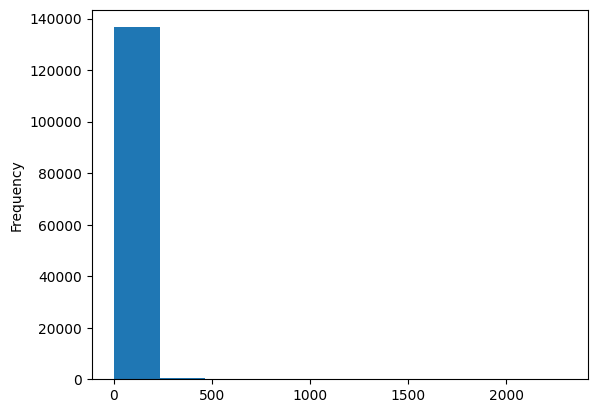

In [13]:
vin_reviews['price'].plot.hist()
plt.show()

The real reason I excluded the >$200 bottles earlier; some of these vintages are really expensive! And the chart
will "grow" to include them, to the detriment of the rest of the data being shown.

In [14]:
print(vin_reviews[vin_reviews['price']>1500])

      country                                        description  \
13318      US  The nose on this single-vineyard wine from a s...   
34920  France  A big, powerful wine that sums up the richness...   
34922  France  A massive wine for Margaux, packed with tannin...   

               designation  points   price    province     region_1  \
13318  Roger Rose Vineyard      91  2013.0  California  Arroyo Seco   
34920                  NaN      99  2300.0    Bordeaux     Pauillac   
34922                  NaN      98  1900.0    Bordeaux      Margaux   

            region_2                   variety           winery  
13318  Central Coast                Chardonnay            Blair  
34920            NaN  Bordeaux-style Red Blend   Château Latour  
34922            NaN  Bordeaux-style Red Blend  Château Margaux  


There are only 3 vin cost more than 1500,

There are many ways of dealing with the skewed data problem; those are outside the scope of this tutorial.
The easiest is to just do what I did: cut things off at a sensible level.

This phenomenon is known (statistically) as skew, and it's a fairly common occurrence among interval variables.

<AxesSubplot:ylabel='Frequency'>

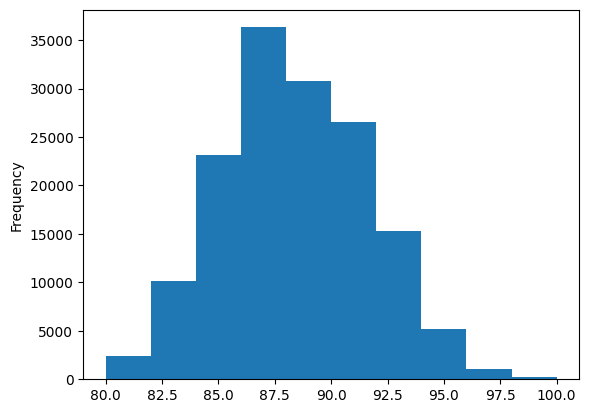

In [15]:
vin_reviews['points'].plot.hist()


Histograms work best for interval variables without skew. They also work really well for ordinal categorical variables like points

## 1.5 Exercise

Let's put what we have learned in this lesson into practice.

In [17]:
pokemon_input_file = 'https://minio.lab.sspcloud.fr/pengfei/diffusion/data_viz/Pokemon.csv'
pokemon = pd.read_csv(pokemon_input_file)

In [18]:
# check column name and type
print(pokemon.dtypes)

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


In [19]:
# 1 check the shape of data frame
print(pokemon.shape)

(800, 13)


In [20]:
# 2 check the number of missing value of each column
print(pokemon.isnull().sum())


#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [21]:
# 3
print(pokemon.describe)


<bound method NDFrame.describe of        #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     

In [22]:
# 4
print(pokemon.head(3))

   #       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3   Venusaur  Grass  Poison    525  80      82       83      100      100   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  


### Q1. Show the frequency of pokemon type

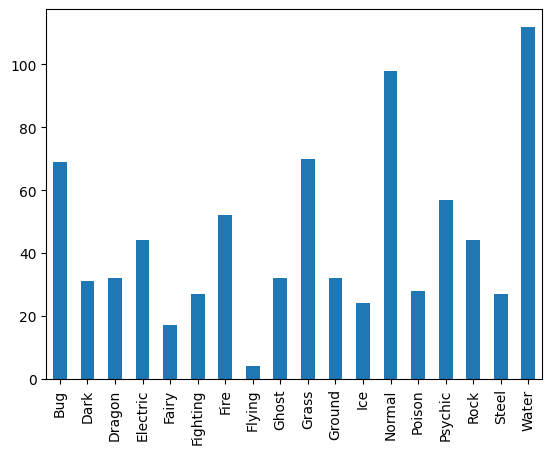

In [24]:
# sort index using alpha sort
sorted_pokemon_type_count=pokemon['Type 1'].value_counts().sort_index()
sorted_pokemon_type_count.plot.bar()
plt.show()

<AxesSubplot:>

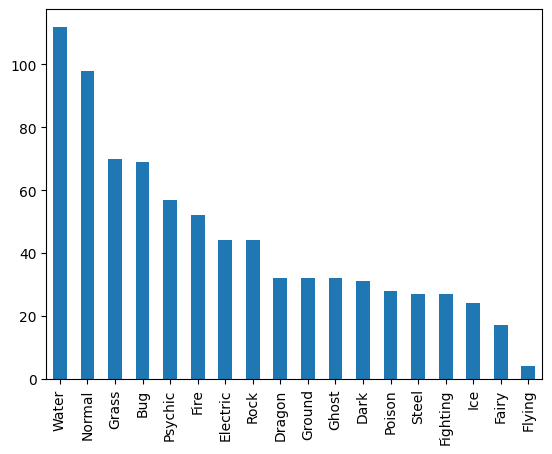

In [25]:
# without sorting
pokemon_type_count=pokemon['Type 1'].value_counts()
pokemon_type_count.plot.bar()

### Q2 The frequency of pokemon by hp

<AxesSubplot:>

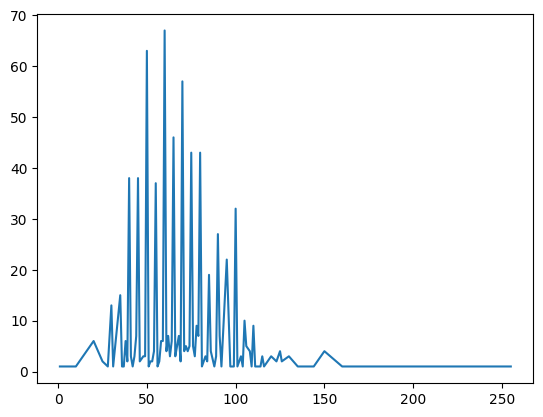

In [26]:
pokemon_hp_count = pokemon['HP'].value_counts().sort_index()
pokemon_hp_count.plot.line()

### Q3 the frequency of pokemon by speed

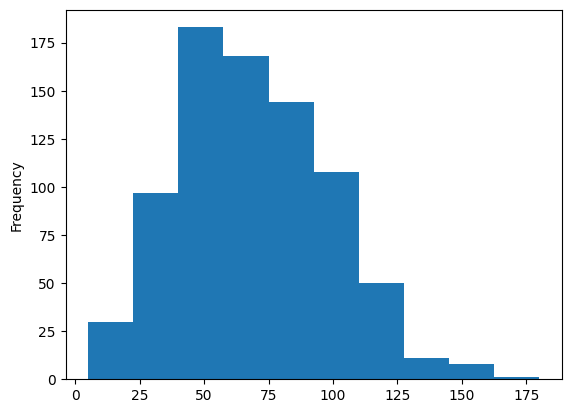

In [27]:

# be ware of skewed data
pokemon_weight_count = pokemon['Speed'].plot.hist()
plt.show()